In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_text
from sklearn.tree import export_graphviz

#### Data Loading and Data Information

In [8]:
url = "bank-full.csv"
data = pd.read_csv(url, sep=';')

In [9]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [11]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
data.size

768587

In [13]:
data.shape

(45211, 17)

In [14]:
data.index

RangeIndex(start=0, stop=45211, step=1)

In [15]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [16]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Data Handling

In [18]:
data = pd.get_dummies(data, drop_first=True)

In [20]:
X = data.drop(columns=['y_yes'])
y = data['y_yes']

#### Spliting the Data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
X_train
X_test

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3776,40,580,16,192,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
9928,47,3644,9,83,2,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True
33409,25,538,20,226,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
31885,42,1773,9,311,1,336,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15738,56,217,21,121,2,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9016,46,2800,5,47,1,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True
380,38,757,6,133,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
7713,41,4539,30,298,3,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
12188,41,1309,20,28,4,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [30]:
y_train

10747    False
26054    False
9125     False
41659    False
4443     False
         ...  
11284     True
44732    False
38158    False
860      False
15795    False
Name: y_yes, Length: 31647, dtype: bool

In [31]:
y_test

3776     False
9928     False
33409    False
31885    False
15738    False
         ...  
9016     False
380      False
7713     False
12188    False
28550    False
Name: y_yes, Length: 13564, dtype: bool

#### Training the Decision Tree Classifier

In [28]:
# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Evaluating the Model

In [29]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8720141551164848
              precision    recall  f1-score   support

       False       0.93      0.93      0.93     11966
        True       0.46      0.46      0.46      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.69     13564
weighted avg       0.87      0.87      0.87     13564



In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[11086   880]
 [  856   742]]


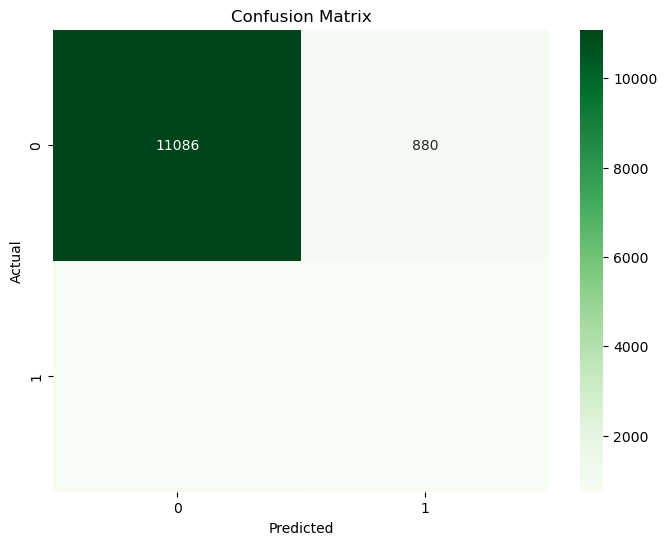

In [49]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [52]:
tree_structure = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Structure:")
print(tree_structure)

Decision Tree Structure:
|--- duration <= 510.50
|   |--- poutcome_success <= 0.50
|   |   |--- age <= 60.50
|   |   |   |--- month_mar <= 0.50
|   |   |   |   |--- duration <= 203.50
|   |   |   |   |   |--- month_oct <= 0.50
|   |   |   |   |   |   |--- duration <= 140.50
|   |   |   |   |   |   |   |--- age <= 26.50
|   |   |   |   |   |   |   |   |--- housing_yes <= 0.50
|   |   |   |   |   |   |   |   |   |--- duration <= 88.50
|   |   |   |   |   |   |   |   |   |   |--- job_unemployed <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |   |   |--- job_unemployed >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- duration >  88.50
|   |   |   |   |   |   |   |   |   |   |--- month_may <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- month_may >  0.50
|   |   |   |   |   |   |